# **Robot Learning – Reinforcement Learning**

The goal of this practical exercise is to implement a Reinforcement Learning algorithm to learn a policy that moves a robot to a goal position. The algorithm is the Q-learning algorithm.

## The Problem
The problem consists in finding the goal in a finite 2D environment that is closed and contains some obstacles.

**States and actions:** The size of the environment is 20x14=280 states. The robot can only do 4 different actions: {←, ↑, →, ↓} (not diagonal movements!). Therefore the size of the Q function will be 280x4=1120 cells.

**Dynamics:** The robot can be located in any free cell (not in the obstacle cells!). The function that describes the dynamics is very simple: the robot will move ONE cell per iteration to the direction of the action that we select, unless there is an obstacle or the wall in front of it, in which case it will
stay in the same position.

**Reinforcement function:** Since the goal is to reach the goal position as fast as possible, the reinforcement function will give -1 in all cells except in the goal cell, where the reward will be +1. The cell that contains the goal is (3,17).

## Data

Next you have the map that will be used as the environment for the Q-learning algorithm:

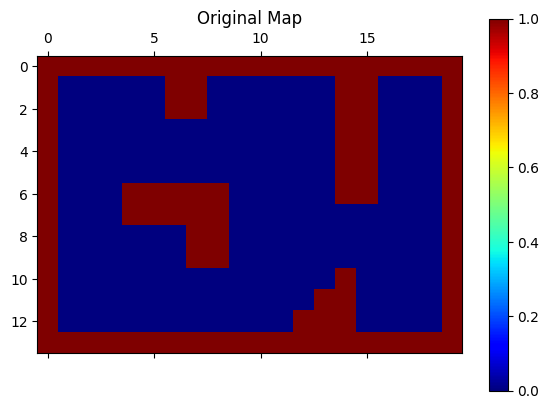

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Proposed Map
map=[
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# Convert Map 2D array to Numpy array
grid_map = np.array(map)

# Show grid map
plt.matshow(grid_map, cmap = "jet")
plt.title('Original Map')
plt.colorbar()


## Algorithm

In order to implement the Q-learning algorithm, you should follow the next pseudocode:

*Initialize Q(s,a) to “0”*

>*For n episodes*

>>*Initialize s randomly in any free cell*

>>*For m iterations repeat*

>>>*Choose a following ε-greedy policy*

>>>*Take action a, observe r, s’*

>>>*Q(s,a)←Q(s,a) + α ( r + γ · maxQ_a’(s’,a’)-Q(s,a))*

>>>*s←s’*

>>>*if the goal is achieved then finish the episode*

>>*endFor*

*endFor*


You will have to set several parameters experimentally: n, m, ε, α and γ.




## Environment

In the environment class, you set the possible actions, the rewards obtained depending of those actions and the state of the agent after the action is applied.

You have to fill the empty functions following the previous pseudocode.

In [ ]:
import random
class MapEnv:
    def __init__(self, map, goal):
        self.map = map
        self.current_state = self.get_start()
        self.goal = goal.astype(np.int32)
        self.actions = 4
        if map[goal[0], goal[1]] != 0:
            raise ValueError("Goal position is an obstacle")

    def reset(self):
        self.current_state = self.get_start()
        return self.current_state

    def get_start(self):
      # start the agent in a RANDOM position within the map:

      # map == 0 (free space)/1(obstacles)

        valid_positions = np.argwhere(self.map == 0)
        start_position = random.choice(valid_positions)
        return start_position


    def step(self, action):
      # this function applies the ACTION taken and returns the next state, the reward and a variable that says if the goal is reached
      # action: 0 = up, 1 = down, 2 = left, 3 = right

        row, col = self.current_state

        if action == 0 and row > 0 and self.map[row - 1, col] == 0:
            row -= 1
        elif action == 1 and row < self.map.shape[0] - 1 and self.map[row + 1, col] == 0:
            row += 1
        elif action == 2 and col > 0 and self.map[row, col - 1] == 0:
            col -= 1
        elif action == 3 and col < self.map.shape[1] - 1 and self.map[row, col + 1] == 0:
            col += 1

        # updating curr
        self.current_state = np.array([row, col])

        # goal reached condition
        done = np.array_equal(self.current_state, self.goal)

        # reward =-1 (as studied in the AS lecture slides)
        reward = -1 if not done else 1

        # required
        return np.array(self.current_state), reward, done

    def render(self, i=0):
        plt.matshow(self.map, cmap = "jet")
        plt.title('Map')
        plt.colorbar()
        plt.scatter(self.current_state[1], self.current_state[0], c = 'r')
        plt.scatter(self.goal[1], self.goal[0], c = 'g')
        plt.savefig("q_learning_{0:04}.png".format(i), dpi = 300)
        plt.show()

## QLearning algorithm

QLearning class creates and trains the policy at every episode using the information provided by the environment. After the training is over, the optimal policy and the value function are obtained.

As in the MapEnv class, you have to fill the empty functions following the previous pseudocode.

In [ ]:
class QLearning:
    def __init__(self, env, alpha, gamma, epsilon, n_episodes, n_iterations):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_episodes = n_episodes
        self.n_iterations = n_iterations
        self.Q = np.random.rand(env.map.shape[0], env.map.shape[1], env.actions)

    def epsilon_greedy_policy(self, s, epsilon):
      # Epsilon greedy policy (choose a random action with probability epsilon)
      # return ACTION

      # slide 16
        if np.random.rand() < epsilon:
            return np.random.choice(self.env.actions)
        else:
            return np.argmax(self.Q[s[0], s[1]])


    def episode(self, alpha, epsilon):
      # Episode execution for n_iterations. Generate an action with epsilon_greedy_policy
      # psuedo algo implementation
        total_reward = 0
        s = self.env.reset()

        for _ in range(self.n_iterations):
            a = self.epsilon_greedy_policy(s, epsilon)
            s_prime, r, done = self.env.step(a)

            self.Q[s[0], s[1], a] += alpha * (r + self.gamma * np.max(self.Q[s_prime[0], s_prime[1]]) - self.Q[s[0], s[1], a])

            total_reward += r
            s = s_prime

            if done:
                break

        return total_reward


    def train(self, check_every_n_episodes=200, average_n_episodes=50):
        """Execute n_episodes and every 200 episodes stop training in order to retrieve
            the average reward for 100 episodes, then resume training"""

        accumulated_rewards = []
        for i in range(self.n_episodes):
            self.episode(self.alpha, self.epsilon)

            if i % check_every_n_episodes == 0:
                accum_reward = 0
                for j in range(average_n_episodes):
                    total_reward = self.episode(0, 0)
                    accum_reward += total_reward
                accumulated_rewards.append(accum_reward / average_n_episodes)
                print(accumulated_rewards[-1], end=" ")

        return accumulated_rewards

    def get_optimal_policy(self):
        """Retrieve the optimal policy from Q(s,a)"""
        policy = np.argmax(self.Q, axis = 2)
        policy[self.env.map == 1] = -1
        policy[self.env.goal[0], self.env.goal[1]] = -2
        return policy

    def value_function(self):
        """Retrieve the optimal value function from from Q(s,a)"""
        v = np.max(self.Q, axis = 2)
        v[self.env.map == 1] = -np.inf
        return v


## Training

For the training you need to choose some parameters experimentally. Uncomment the parameters and test different values to see how the training results change.

Parameters:

*alpha*: learning rate of the algorithm

*gamma*: discount factor of the algorithm

*epsilon*: random action probability

*n_episodes*: number of episode repetitions

*n_iterations*: number of iterations per episode

-100.0 -93.97 -89.99 -79.63 -71.49 -54.85 -65.87 -51.83 -54.13 -50.48 -59.19 -37.39 -55.16 -32.67 -37.26 -36.91 -38.46 -32.22 -25.34 -24.72 -27.01 -18.83 -19.2 -27.88 -17.62 -21.27 -15.59 -19.31 -16.2 -20.92 -19.63 -15.94 -16.24 -14.49 -14.85 -13.55 -13.69 -16.71 -19.41 -14.54 -16.08 -16.89 -13.03 -15.6 -16.73 -14.89 -14.48 -15.5 -16.84 -11.5 -12.51 -15.85 -12.24 -13.57 -11.44 -14.11 -14.32 -13.52 -12.98 -13.78 -13.39 -11.49 -11.93 -13.79 -11.84 -13.11 -12.84 -12.62 -12.19 -16.94 -12.89 -12.66 -13.23 -13.28 -12.74 -13.09 -13.5 -12.28 -11.97 -13.68 -11.8 -12.29 -12.74 -11.72 -12.93 -12.56 -12.83 -13.03 -12.94 -12.48 -12.51 -12.06 -12.1 -13.13 -13.26 -11.86 -11.83 -11.44 -13.74 -13.62 

Text(0.5, 1.0, 'Effectiveness evolution')

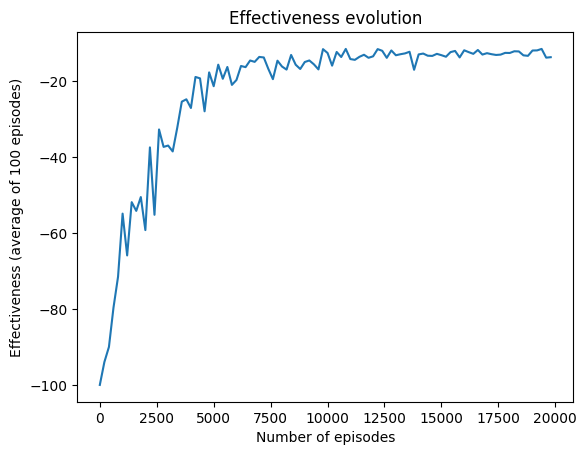

In [ ]:
env = MapEnv(grid_map, np.array([3, 17]))
alpha = 0.1
gamma = 0.9
epsilon = 0.3
n_episodes = 20000
n_iterations = 100
ql = QLearning(env, alpha, gamma, epsilon, n_episodes, n_iterations)
rewards = ql.train(average_n_episodes=100)
plt.plot(np.arange(0, n_episodes, 200),rewards)
plt.xlabel("Number of episodes")
plt.ylabel("Effectiveness (average of 100 episodes)")
plt.title("Effectiveness evolution")

## Plot value function and optimal policy

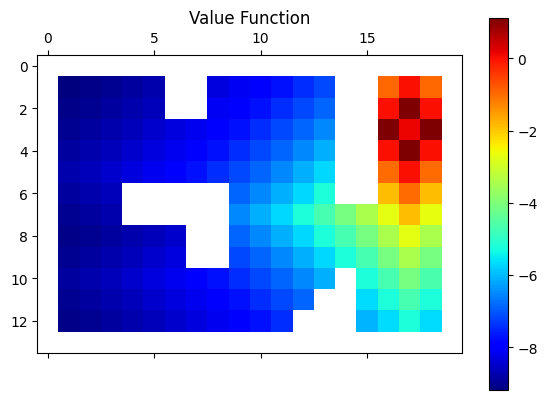

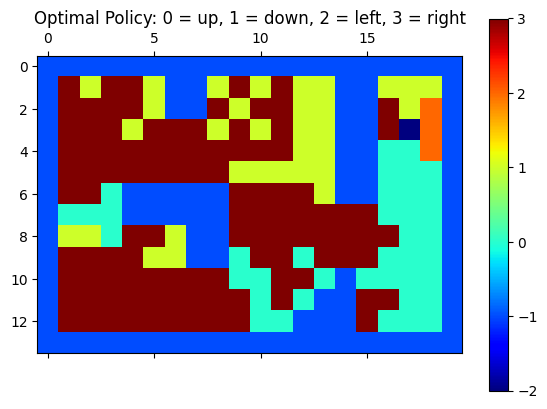

In [ ]:
v = ql.value_function()
plt.matshow(v, cmap = "jet")
plt.title('Value Function')
plt.colorbar()

policy = ql.get_optimal_policy()
plt.matshow(policy, cmap = "jet")
plt.title('Optimal Policy: 0 = up, 1 = down, 2 = left, 3 = right')
plt.colorbar()


## Test current Policy

Once the training is over, we can see what the robot has learnt to do. You can test it with other goal positions and other maps, to see of the policy is able to adapt to other situations.

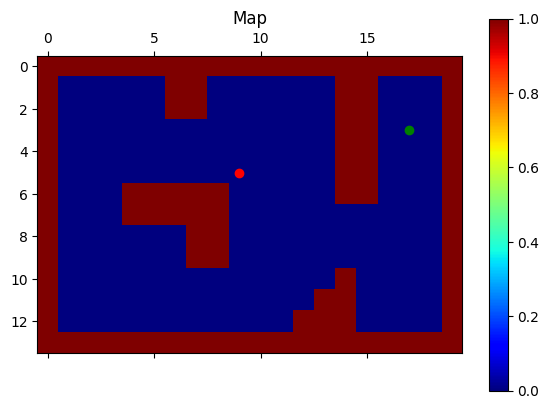

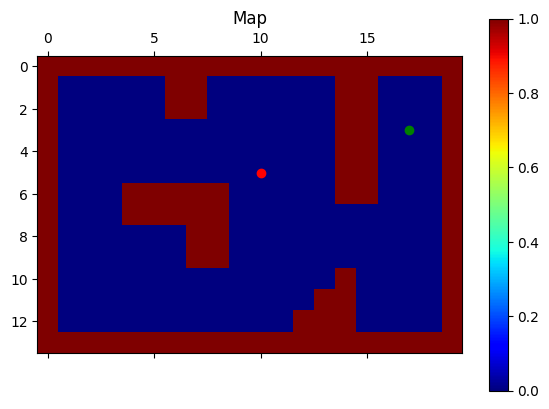

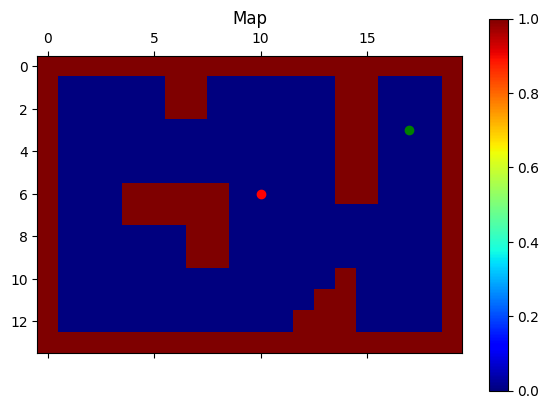

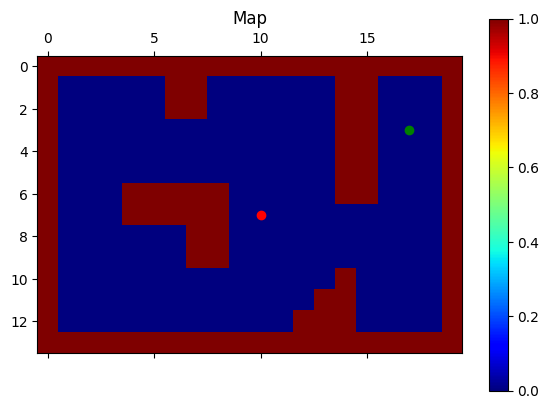

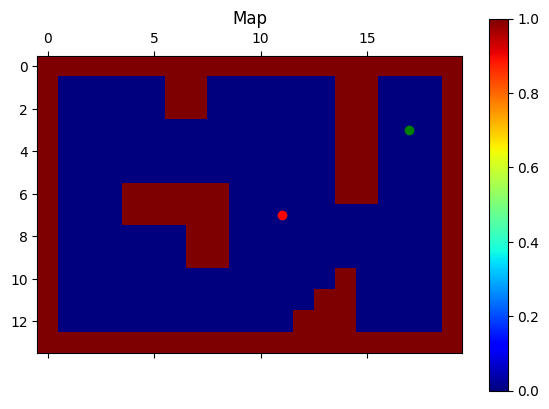

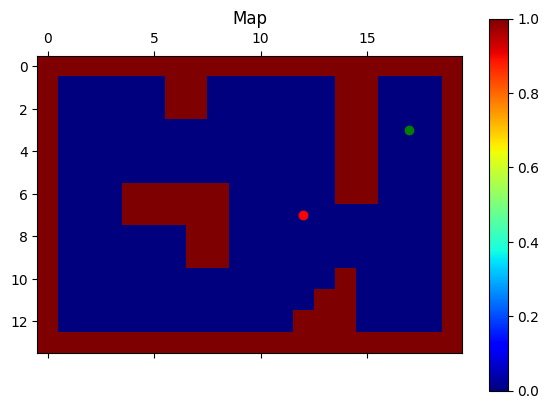

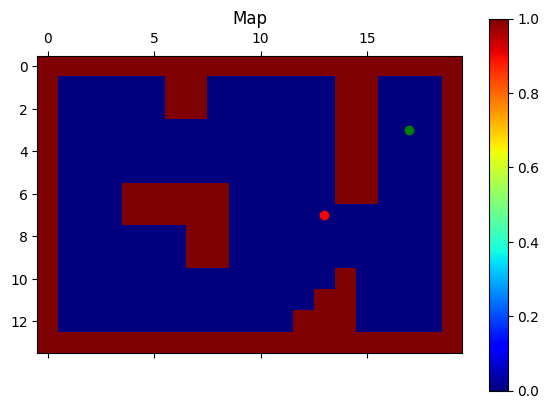

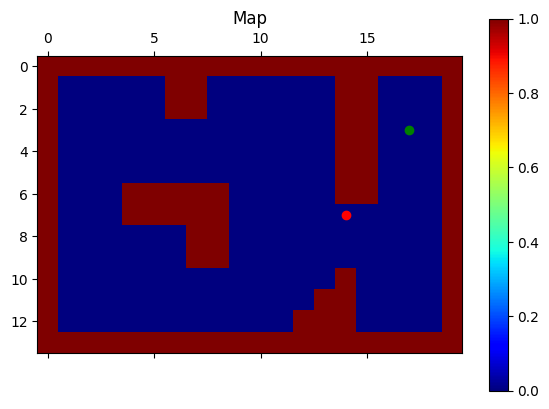

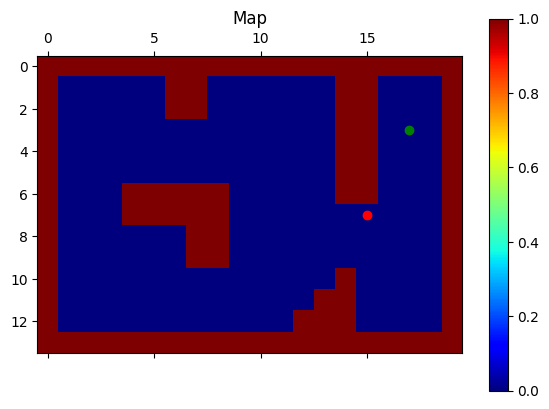

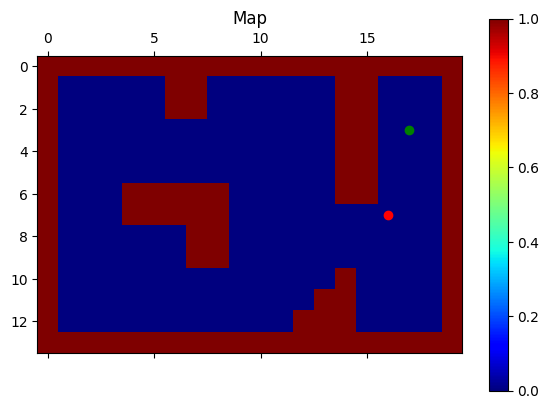

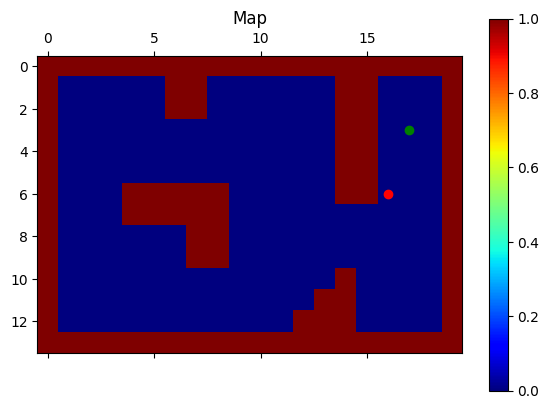

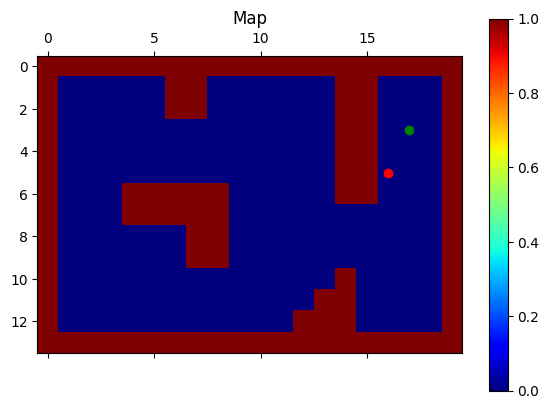

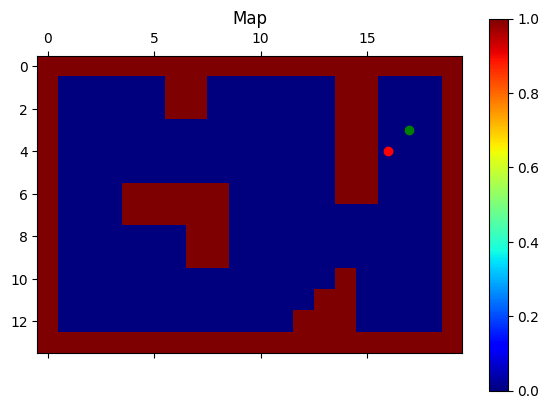

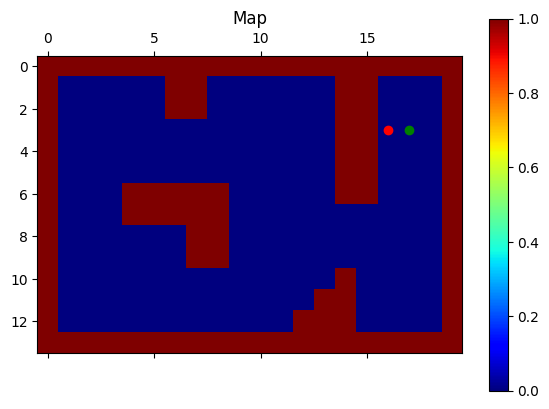

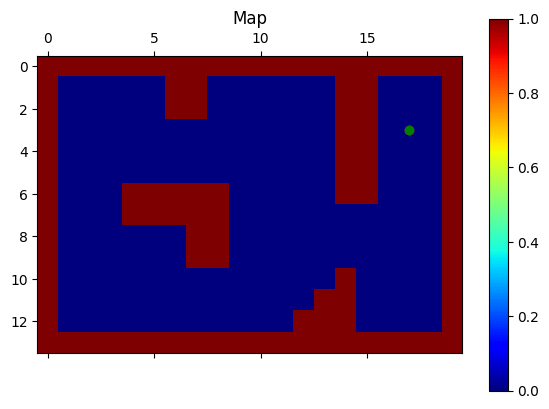

In [ ]:
env = MapEnv(grid_map, np.array([3, 17]))
i = 0

for j in range(1):
    done = False
    s = env.reset()
    while not done:
        a = policy[s[0], s[1]]
        s, reward, done = env.step(a)
        env.render(i)
        i += 1

**Testing different parameters**

-100.0 -97.02 -86.13 -73.99 -63.98 -75.63 -64.13 -59.86 -53.84 -57.06 -44.52 -47.23 -31.26 -41.95 -24.55 -39.73 -34.09 -30.81 -29.4 -21.49 -27.36 -28.14 -23.17 -23.91 -21.64 -26.17 -19.67 -22.03 -20.12 -15.43 -17.54 -20.24 -16.61 -15.99 -13.11 -18.13 -13.46 -15.13 -17.45 -14.12 -13.62 -13.77 -13.07 -13.25 -14.76 -12.71 -13.72 -15.0 -12.59 -13.97 

Text(0.5, 1.0, 'Effectiveness evolution')

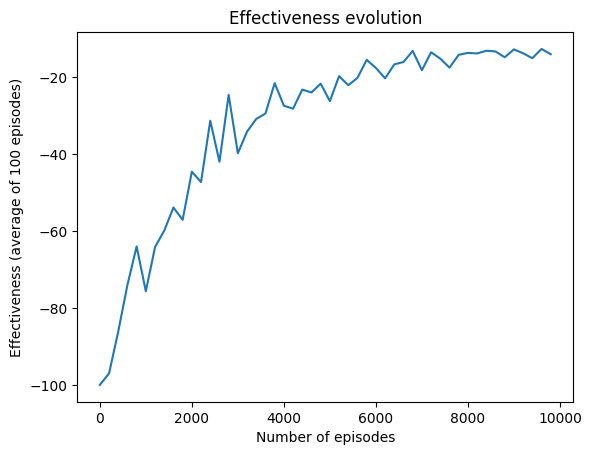

In [ ]:
env = MapEnv(grid_map, np.array([3, 17]))
alpha = 0.1
gamma = 0.9
epsilon = 0.3
n_episodes = 10000
n_iterations = 100
ql = QLearning(env, alpha, gamma, epsilon, n_episodes, n_iterations)
rewards = ql.train(average_n_episodes=100)
plt.plot(np.arange(0, n_episodes, 200),rewards)
plt.xlabel("Number of episodes")
plt.ylabel("Effectiveness (average of 100 episodes)")
plt.title("Effectiveness evolution")

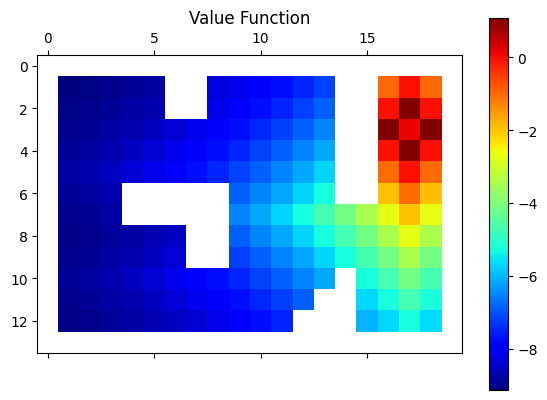

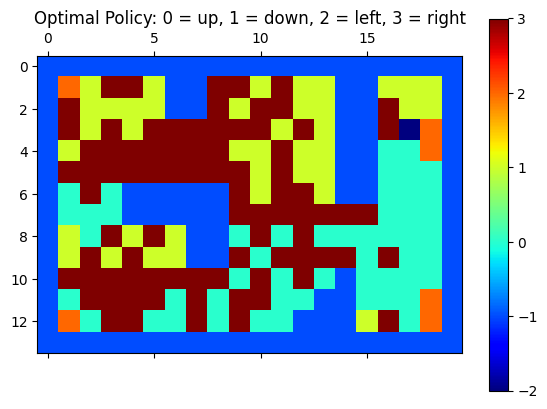

In [ ]:
v = ql.value_function()
plt.matshow(v, cmap = "jet")
plt.title('Value Function')
plt.colorbar()

policy = ql.get_optimal_policy()
plt.matshow(policy, cmap = "jet")
plt.title('Optimal Policy: 0 = up, 1 = down, 2 = left, 3 = right')
plt.colorbar()

## Submission

You must deliver this Python Interactive Notebook. The file must have the name q_learning_YOUR_NAME.ipynb. Also, you must do a report commenting the problems you encountered, a discussion on how the parameters affect the training and conclusions for the results obtained.

Make sure that all cells can be executed.